# TPC1: Análise de dados: doença cardíaca

Descarregue o ficheiro de dados: `myheart.csv`
Crie um programa em Python, conjunto de funções, que responda às seguintes questões:
* Crie uma função que lê a informação do ficheiro para um modelo, previamente pensado em memória;
* Pense num modelo para guardar uma distribuição;
* Crie uma função que calcula a distribuição da doença por sexo;
* Crie uma função que calcula a distribuição da doença por escalões etários. Considere os seguintes escalões: [30-34], [35-39], [40-44], ...
* Crie uma função que calcula a distribuição da doença por níveis de colesterol. Considere um nível igual a um intervalo de 10 unidades, comece no limite inferior e crie os níveis necessários até abranger o limite superior;
* Crie uma função que imprime na forma de uma tabela uma distribuição;
* Especifique um programa que ao executar apresenta as tabelas correspondentes às distribuições pedidas;
* Extra: explore o módulo matplotlib e crie gráficos para as suas distribuições.

# Exercício 1

In [4]:
# idade,sexo,tensão,colesterol,batimento,temDoenças

def readfile():
  model = dict()
  idx = 0
  file = open("myheart.csv")
  for line in file.readlines():
    if idx != 0:
      model[idx-1] = line.strip()
    idx+=1
  return model

print(readfile())

def total():
    return len(readfile().values())


{0: '40,M,140,289,172,0', 1: '49,F,160,180,156,1', 2: '37,M,130,283,98,0', 3: '48,F,138,214,108,1', 4: '54,M,150,195,122,0', 5: '39,M,120,339,170,0', 6: '45,F,130,237,170,0', 7: '54,M,110,208,142,0', 8: '37,M,140,207,130,1', 9: '48,F,120,284,120,0', 10: '37,F,130,211,142,0', 11: '58,M,136,164,99,1', 12: '39,M,120,204,145,0', 13: '49,M,140,234,140,1', 14: '42,F,115,211,137,0', 15: '54,F,120,273,150,0', 16: '38,M,110,196,166,1', 17: '43,F,120,201,165,0', 18: '60,M,100,248,125,1', 19: '36,M,120,267,160,1', 20: '43,F,100,223,142,0', 21: '44,M,120,184,142,0', 22: '49,F,124,201,164,0', 23: '44,M,150,288,150,1', 24: '40,M,130,215,138,0', 25: '36,M,130,209,178,0', 26: '53,M,124,260,112,0', 27: '52,M,120,284,118,0', 28: '53,F,113,468,127,0', 29: '51,M,125,188,145,0', 30: '53,M,145,518,130,1', 31: '56,M,130,167,114,0', 32: '54,M,125,224,122,1', 33: '41,M,130,172,130,1', 34: '43,F,150,186,154,0', 35: '32,M,125,254,155,0', 36: '65,M,140,306,87,1', 37: '41,F,110,250,142,0', 38: '48,F,120,177,148,0'

# Exercício 2


In [140]:
def distribution_by_bpm():
    model = readfile()
    bpm = dict()
    for values in model.values():
        v = values.split(',')
        b = int(v[-2])
        if b not in bpm.keys():
            bpm[b] = 1
        else:
            bpm[b] = bpm.get(b)+1
    
    return dict(sorted(bpm.items()))

print(distribution_by_bpm())

{60: 1, 63: 1, 67: 1, 69: 1, 70: 1, 71: 1, 72: 2, 73: 1, 77: 1, 78: 1, 80: 2, 82: 3, 83: 1, 84: 3, 86: 4, 87: 1, 88: 2, 90: 2, 91: 1, 92: 6, 93: 2, 94: 4, 95: 2, 96: 7, 97: 2, 98: 9, 99: 7, 100: 14, 102: 4, 103: 4, 104: 2, 105: 11, 106: 5, 107: 1, 108: 7, 109: 5, 110: 23, 111: 5, 112: 13, 113: 4, 114: 6, 115: 14, 116: 9, 117: 6, 118: 12, 119: 5, 120: 35, 121: 5, 122: 20, 123: 5, 124: 9, 125: 21, 126: 12, 127: 8, 128: 14, 129: 4, 130: 32, 131: 6, 132: 7, 133: 5, 134: 6, 135: 15, 136: 4, 137: 6, 138: 14, 139: 6, 140: 39, 141: 5, 142: 12, 143: 7, 144: 9, 145: 13, 146: 3, 147: 5, 148: 9, 149: 6, 150: 41, 151: 5, 152: 9, 153: 3, 154: 12, 155: 12, 156: 8, 157: 6, 158: 6, 159: 5, 160: 22, 161: 5, 162: 9, 163: 9, 164: 3, 165: 11, 166: 4, 167: 2, 168: 7, 169: 4, 170: 20, 171: 2, 172: 8, 173: 5, 174: 5, 175: 10, 176: 2, 177: 1, 178: 6, 179: 5, 180: 10, 181: 2, 182: 3, 184: 4, 185: 3, 186: 2, 187: 1, 188: 1, 190: 1, 192: 1, 194: 1, 195: 1, 202: 1}


# Exercício 3

In [156]:
def distribution_by_gender():
    model = readfile()
    sick = dict()
    sick['M'] = 0 # (Y,N)
    sick['F'] = 0 # (Y,N)
    for values in model.values():
        v = values.split(',')
        if int(v[-1]) == 1:
            sick[v[1]] = sick.get(v[1]) + 1

    return sick


res = distribution_by_gender()
total_doente_m = int(res['M'])
total_doente_f = int(res['F'])
print(distribution_by_gender())
print(f"doentes masculino: {res['M']}")
print(f"doentes feminino: {res['F']}")
print(f"total doentes: {total_doente_m + total_doente_f} / {total()} ")


{'M': 428, 'F': 40}
doentes masculino: 428
doentes feminino: 40
total doentes: 468 / 839 


# Exercício 4


In [23]:
# 0 - 4 5 - 9
def distribution_by_age_group():
    model = readfile()
    age_group = dict()
    for values in model.values():
        v = values.split(',')
        lower_bound = int(v[0]) - (int(v[0]) % 5)
        upper_bound = lower_bound + 4
        k = str(lower_bound) + "-" + str(upper_bound)
        if k not in age_group.keys():
            age_group[k] = 1 
        else:
            age_group[k] = age_group.get(k) + 1
                
    return dict(sorted(age_group.items()))

print(distribution_by_age_group())



{'25-29': 4, '30-34': 17, '35-39': 53, '40-44': 88, '45-49': 107, '50-54': 168, '55-59': 172, '60-64': 135, '65-69': 65, '70-74': 23, '75-79': 7}


# Exercício 5


In [24]:
def distribution_by_colesterol():
    colesterol = dict()
    for values in readfile().values():
        v = values.split(',')
        k = int(v[3])
        if k not in colesterol.keys():
            colesterol[k] = 1
        else:
            colesterol[k] = colesterol.get(k) + 1
    return dict(sorted(colesterol.items()))

print(distribution_by_colesterol())

{0: 172, 85: 1, 100: 2, 110: 1, 113: 1, 117: 1, 123: 1, 126: 2, 129: 1, 132: 1, 139: 2, 141: 1, 142: 1, 147: 2, 149: 2, 152: 1, 153: 1, 156: 1, 159: 1, 160: 6, 161: 2, 163: 2, 164: 1, 165: 1, 166: 4, 167: 3, 168: 2, 169: 1, 170: 2, 171: 3, 172: 2, 173: 2, 174: 1, 175: 2, 177: 5, 178: 1, 179: 2, 180: 3, 181: 2, 182: 5, 184: 4, 185: 2, 186: 5, 187: 1, 188: 3, 190: 2, 192: 2, 193: 5, 194: 2, 195: 7, 196: 6, 197: 5, 198: 6, 199: 2, 200: 4, 201: 6, 202: 3, 203: 5, 204: 7, 205: 2, 206: 2, 207: 6, 208: 7, 209: 5, 210: 4, 211: 9, 212: 4, 213: 7, 214: 7, 215: 6, 216: 8, 217: 4, 218: 6, 219: 6, 220: 8, 221: 4, 222: 6, 223: 9, 224: 6, 225: 6, 226: 6, 227: 3, 228: 5, 229: 3, 230: 9, 231: 4, 232: 2, 233: 6, 234: 6, 235: 5, 236: 5, 237: 6, 238: 4, 239: 4, 240: 7, 241: 3, 242: 2, 243: 6, 244: 4, 245: 6, 246: 8, 247: 1, 248: 5, 249: 5, 250: 5, 251: 1, 252: 3, 253: 2, 254: 11, 255: 2, 256: 5, 257: 2, 258: 7, 259: 2, 260: 7, 261: 3, 262: 1, 263: 6, 264: 4, 265: 4, 266: 3, 267: 5, 268: 4, 269: 5, 270: 6,

# Exercício 6


In [170]:
def replicate(c:str,n:int):
    res = str()
    for i in range(0,n):
        res = res + c
    return res

def distribution_to_table(distribution:dict):
    print("---------------")
    spaces = str()
    spaces_out = str()
    for k in distribution.keys():
        match len(str(k)):
            case 1:
                spaces = replicate(" ", 2)
            case 2:
                spaces = " "
            case _:
                spaces = ""
        
        match len(str(distribution.get(k))):
            case 1:
                spaces_out = replicate(" ", 5)
            case 2:
                spaces_out = replicate(" ", 4)
            case 3:
                spaces_out = replicate(" ", 3)
            case _:
                spaces_out = replicate(" ", 2)
        
        spaces_out = spaces_out + '|'
        
        print(f"|{str(k)} {spaces}| {str(distribution[k])} {spaces_out}")
        print("---------------")
    
distribution_to_table(distribution_by_gender())

---------------
|M   | 428    |
---------------
|F   | 40     |
---------------


# Exercício 7


In [175]:
def distributions_to_table():
    print(distribution_to_table(distribution_by_bpm()))
    print(distribution_to_table(distribution_by_gender()))
    print(distribution_to_table(distribution_by_age_group()))
    print(distribution_to_table(distribution_by_colesterol()))

print(distributions_to_table())

---------------
|60  | 1      |
---------------
|63  | 1      |
---------------
|67  | 1      |
---------------
|69  | 1      |
---------------
|70  | 1      |
---------------
|71  | 1      |
---------------
|72  | 2      |
---------------
|73  | 1      |
---------------
|77  | 1      |
---------------
|78  | 1      |
---------------
|80  | 2      |
---------------
|82  | 3      |
---------------
|83  | 1      |
---------------
|84  | 3      |
---------------
|86  | 4      |
---------------
|87  | 1      |
---------------
|88  | 2      |
---------------
|90  | 2      |
---------------
|91  | 1      |
---------------
|92  | 6      |
---------------
|93  | 2      |
---------------
|94  | 4      |
---------------
|95  | 2      |
---------------
|96  | 7      |
---------------
|97  | 2      |
---------------
|98  | 9      |
---------------
|99  | 7      |
---------------
|100 | 14     |
---------------
|102 | 4      |
---------------
|103 | 4      |
---------------
|104 | 2      |
--------

# Exercício 8


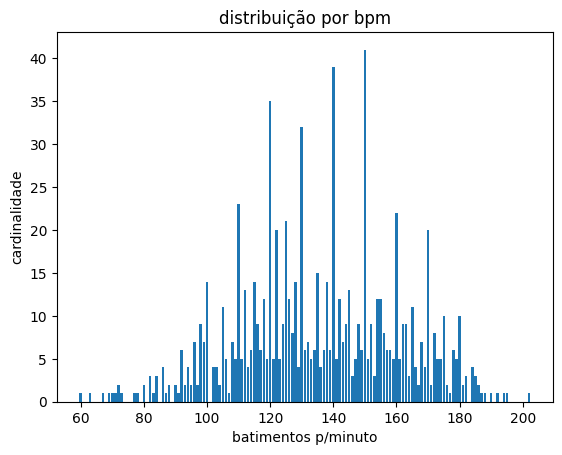

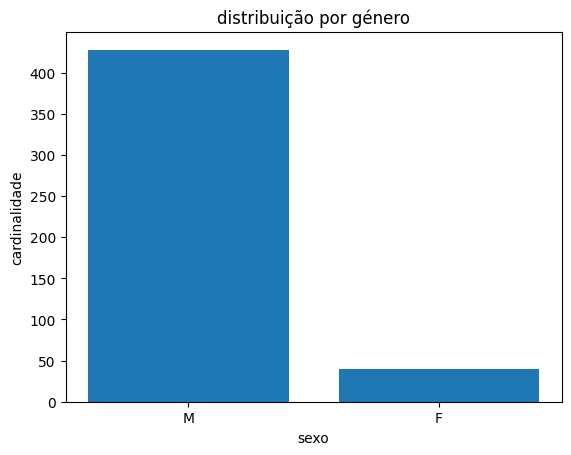

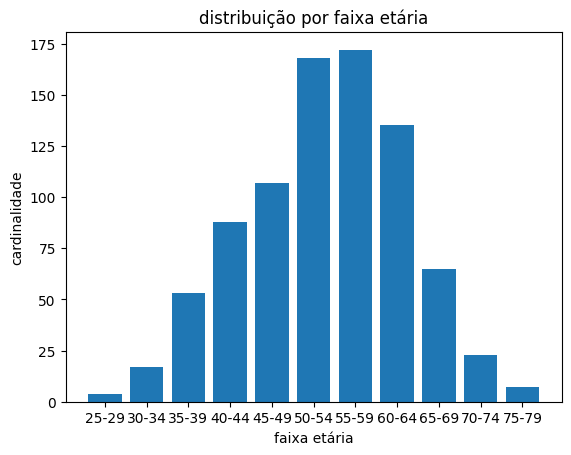

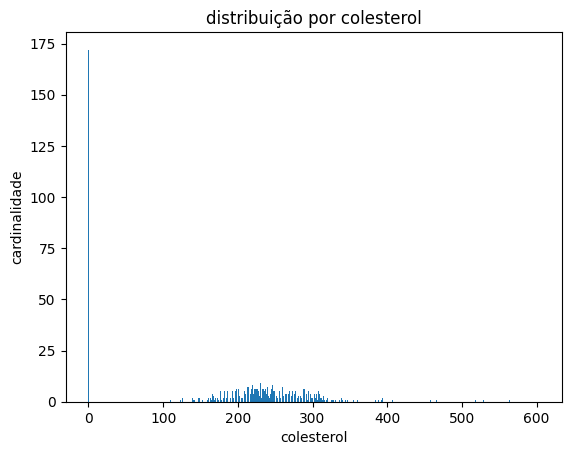

In [176]:
import matplotlib.pyplot as plt;

def distribution_graph():
    bpm = distribution_by_bpm()
    gender = distribution_by_gender()
    age_group = distribution_by_age_group()
    colesterol = distribution_by_colesterol()
    
    _, ax = plt.subplots()
    ax.bar(bpm.keys(), bpm.values())
    ax.set_title('distribuição por bpm')
    ax.set_xlabel("batimentos p/minuto")
    ax.set_ylabel('cardinalidade')
    plt.show()
    
    _, bx = plt.subplots()
    bx.bar(gender.keys(), gender.values())
    bx.set_title('distribuição por género')
    bx.set_xlabel("sexo")
    bx.set_ylabel('cardinalidade')
    plt.show()

    _, cx = plt.subplots()
    cx.bar(age_group.keys(), age_group.values())
    cx.set_title('distribuição por faixa etária')
    cx.set_xlabel("faixa etária")
    cx.set_ylabel('cardinalidade')
    plt.show()

    _, dx = plt.subplots()
    dx.bar(colesterol.keys(), colesterol.values())
    dx.set_title('distribuição por colesterol')
    dx.set_xlabel("colesterol")
    dx.set_ylabel('cardinalidade')

    plt.show()
    
distribution_graph()